<a href="https://colab.research.google.com/github/Nimishajain77/39_SANS_2/blob/Arya/Crop_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# uploading
data=pd.read_csv("csv.csv")

In [ ]:
data.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         2238 non-null   object
 1   district      2238 non-null   object
 2   market        2238 non-null   object
 3   commodity     2238 non-null   object
 4   variety       2238 non-null   object
 5   arrival_date  2238 non-null   object
 6   min_price     2238 non-null   int64 
 7   max_price     2238 non-null   int64 
 8   modal_price   2238 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 157.5+ KB


In [ ]:
data.isnull().sum()

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

In [ ]:
data['state'].value_counts()

Uttar Pradesh          574
Kerala                 274
Tamil Nadu             183
Punjab                 180
West Bengal            162
Maharashtra            162
Gujarat                113
Himachal Pradesh       102
Odisha                  86
Haryana                 65
Assam                   58
Manipur                 52
Madhya Pradesh          44
Rajasthan               41
Karnataka               36
Uttrakhand              21
Tripura                 18
Telangana               15
Andaman and Nicobar     15
Andhra Pradesh           7
Pondicherry              7
Meghalaya                6
Nagaland                 6
Chattisgarh              5
Jammu and Kashmir        3
Goa                      3
Name: state, dtype: int64

In [ ]:
data['district'].value_counts()

Agra              123
Pune               89
Saharanpur         79
Kangra             75
Thirssur           71
                 ... 
Surajpur            1
Kurukshetra         1
Baran               1
Kachchh             1
Ramanathapuram      1
Name: district, Length: 174, dtype: int64

In [ ]:
data['market'].value_counts()

Pune               44
Palampur           31
Karad              30
Padra              30
Kangra(Jassour)    29
                   ..
Palani              1
Dharapuram          1
Elumathur           1
Kunnathur           1
Sevur               1
Name: market, Length: 326, dtype: int64

In [ ]:
data['variety'].value_counts()

Other             1008
Green Chilly        49
Cauliflower         43
Red                 43
Carrot              41
                  ... 
New Variety          1
Turmeric (raw)       1
Hosur Red            1
Simla                1
Super Fine           1
Name: variety, Length: 218, dtype: int64

In [ ]:
#checking for whichs crops are present in dataset
data['commodity'].value_counts()

Potato                 113
Tomato                 103
Onion                   99
Paddy(Dhan)(Common)     99
Brinjal                 99
                      ... 
Tender Coconut           1
Betal Leaves             1
Broken Rice              1
Corriander seed          1
Plum                     1
Name: commodity, Length: 156, dtype: int64

Preprocessing the data

In [ ]:
def preprocess(dataframe):
  dataframe=dataframe.copy()

  return dataframe

In [ ]:
X=preprocess(data)

In [ ]:
{column:len(X[column].unique()) for column in X.select_dtypes('object').columns}

{'state': 26,
 'district': 174,
 'market': 326,
 'commodity': 156,
 'variety': 218,
 'arrival_date': 1}

In [ ]:
pd.get_dummies(X['state'],prefix='state')

,state_Andaman and Nicobar,state_Andhra Pradesh,state_Assam,state_Chattisgarh,state_Goa,state_Gujarat,state_Haryana,state_Himachal Pradesh,state_Jammu and Kashmir,state_Karnataka,...,state_Odisha,state_Pondicherry,state_Punjab,state_Rajasthan,state_Tamil Nadu,state_Telangana,state_Tripura,state_Uttar Pradesh,state_Uttrakhand,state_West Bengal
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
pd.get_dummies(X['district'],prefix='district')

,district_Agra,district_Ahmednagar,district_Alappuzha,district_Aligarh,district_Allahabad,district_Ambala,district_Amreli,district_Amritsar,district_Anand,district_Angul,...,district_Tonk,district_Tumkur,district_UdhamSinghNagar,district_Uttar Dinajpur,district_Vadodara(Baroda),district_Valsad,district_Vellore,district_Villupuram,district_Virudhunagar,district_West Godavari
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
pd.get_dummies(X['market'],prefix='market')

,market_Acharapakkam,market_Achnera,market_Adampur,market_Ait,market_Akluj,market_Aliganj,market_Ammoor,market_Anaimalai,market_Anchal,market_Angul,...,market_Vellore,market_Velur,market_Vemulawada,market_Vikkiravandi,market_Villupuram,market_Viswan,market_Voligonda,market_Vyra,market_Yawal,market_Zaloosa-Chararishrief (F&V)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


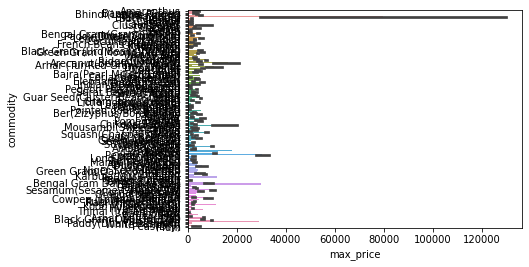

In [ ]:
sns.barplot(data=data, x='max_price',y='commodity')

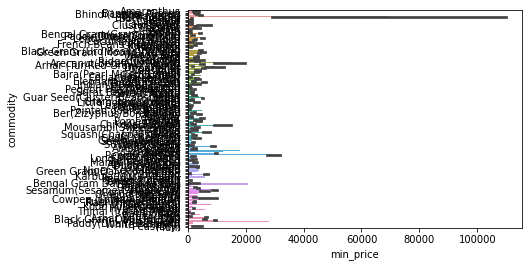

In [ ]:
sns.barplot(data=data, x='min_price',y='commodity')

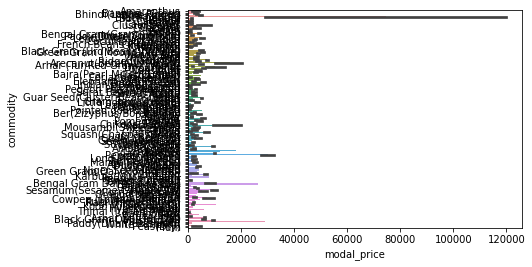

In [ ]:
sns.barplot(data=data, x='modal_price',y='commodity')

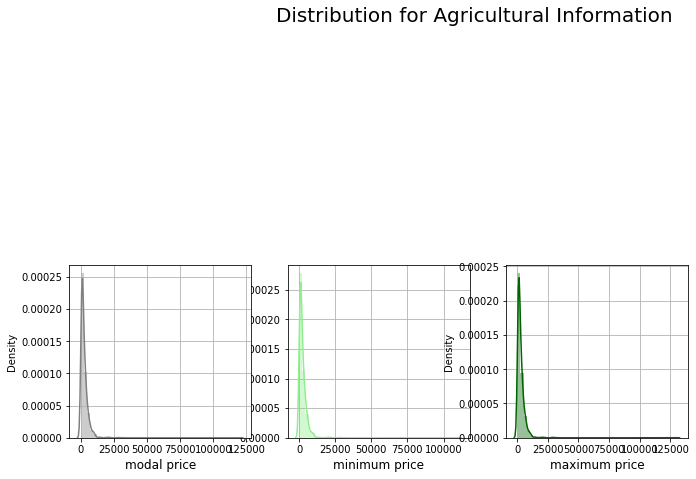

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 6)
sns.distplot(data['min_price'], color = 'lightgreen')
plt.xlabel('minimum price', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['max_price'], color = 'darkgreen')
plt.xlabel('maximum price', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['modal_price'], color = 'grey')
plt.xlabel('modal price', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Information', fontsize = 20)
plt.show()

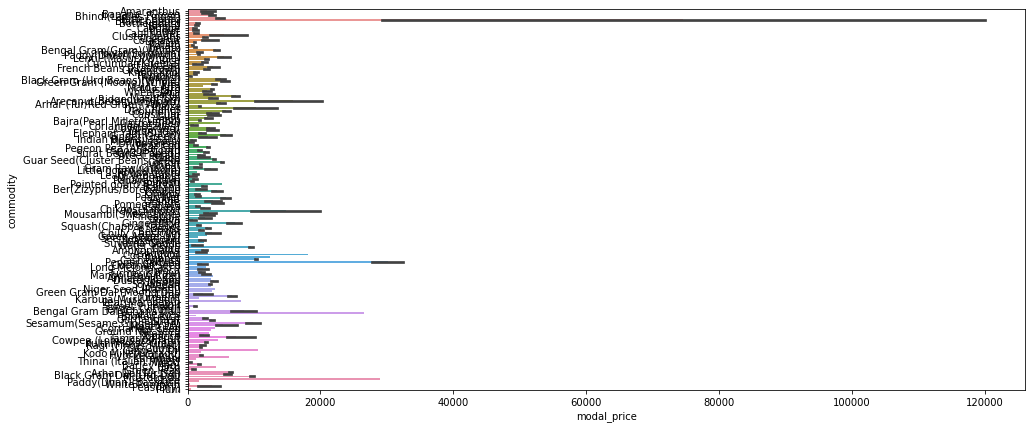

In [ ]:
sns.barplot(data=data, x='modal_price',y='commodity')

In [ ]:
data=data.drop(['arrival_date','min_price','modal_price'],axis='columns')

One-hot encoding

In [ ]:
X=preprocess(data)
{column:len(X[column].unique()) for column in X.select_dtypes('object').columns}

{'state': 26, 'district': 174, 'market': 326, 'commodity': 156, 'variety': 218}

In [ ]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['state', 'district','market','commodity','variety'],drop_first=True)
print(one_hot_encoded_data)

      max_price  state_Andhra Pradesh  state_Assam  state_Chattisgarh  \
0          8000                     0            0                  0   
1          5500                     0            0                  0   
2          8000                     0            0                  0   
3          8000                     0            0                  0   
4        130000                     0            0                  0   
...         ...                   ...          ...                ...   
2233        570                     0            0                  0   
2234       3650                     0            0                  0   
2235       4600                     0            0                  0   
2236       3550                     0            0                  0   
2237       2125                     0            0                  0   

      state_Goa  state_Gujarat  state_Haryana  state_Himachal Pradesh  \
0             0              0              0     

In [ ]:
one_hot_encoded_data.head(2238)

,max_price,state_Andhra Pradesh,state_Assam,state_Chattisgarh,state_Goa,state_Gujarat,state_Haryana,state_Himachal Pradesh,state_Jammu and Kashmir,state_Karnataka,...,variety_Water Melon,variety_Wheat Atta,variety_White,variety_White Ponni,variety_White Pumpkin,variety_Whole,variety_Yellow,variety_Yellow (Black),variety_api,variety_other
0,8000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,130000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2234,3650,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2235,4600,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2236,3550,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
one_hot_encoded_data = one_hot_encoded_data.reindex(columns = [col for col in one_hot_encoded_data.columns if col != 'max_price'] + ['max_price'])
one_hot_encoded_data


,state_Andhra Pradesh,state_Assam,state_Chattisgarh,state_Goa,state_Gujarat,state_Haryana,state_Himachal Pradesh,state_Jammu and Kashmir,state_Karnataka,state_Kerala,...,variety_Wheat Atta,variety_White,variety_White Ponni,variety_White Pumpkin,variety_Whole,variety_Yellow,variety_Yellow (Black),variety_api,variety_other,max_price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5500
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,570
2234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3650
2235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4600
2236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3550


In [ ]:
one_hot_encoded_data = one_hot_encoded_data.reindex(columns = [col for col in one_hot_encoded_data.columns if col != 'max_price'] + ['max_price'])
one_hot_encoded_data


,state_Andhra Pradesh,state_Assam,state_Chattisgarh,state_Goa,state_Gujarat,state_Haryana,state_Himachal Pradesh,state_Jammu and Kashmir,state_Karnataka,state_Kerala,...,variety_Wheat Atta,variety_White,variety_White Ponni,variety_White Pumpkin,variety_Whole,variety_Yellow,variety_Yellow (Black),variety_api,variety_other,max_price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5500
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,570
2234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3650
2235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4600
2236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3550


In [ ]:
X = one_hot_encoded_data.iloc[:,:-1].values
print(X)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
Y=one_hot_encoded_data.iloc[:,-1].values
print(Y)

[8000 5500 8000 ... 4600 3550 2125]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Linear Regression

loading the linear regression model

In [ ]:
lin_reg_model=LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()


Model Evaluation


In [ ]:
training_data_prediction=lin_reg_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R2 Error :", error_score)

R2 Error : 0.854020023195366


Visualization

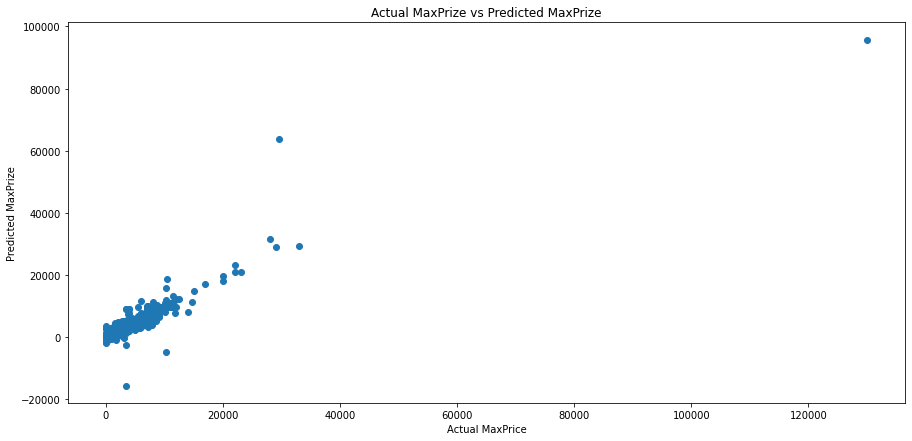

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual MaxPrice")
plt.ylabel("Predicted MaxPrize")
plt.title("Actual MaxPrize vs Predicted MaxPrize")
plt.show()

In [ ]:
test_data_prediction=lin_reg_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R2 Error :", error_score)

R2 Error : -4.383924275925656e+24


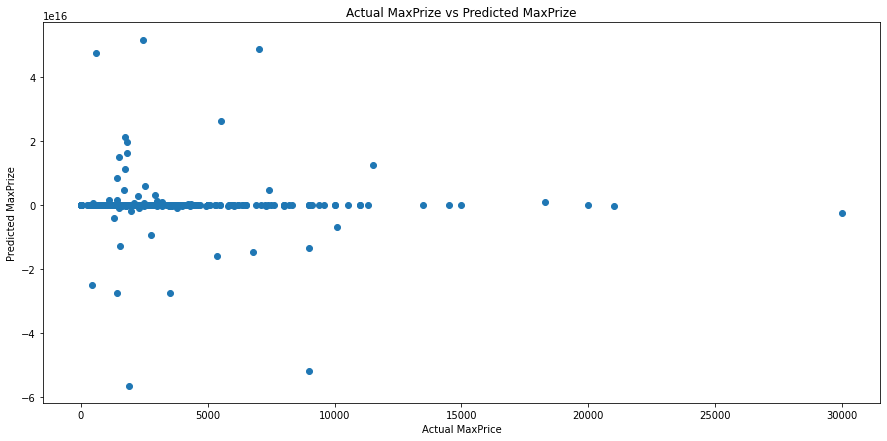

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual MaxPrice")
plt.ylabel("Predicted MaxPrize")
plt.title("Actual MaxPrize vs Predicted MaxPrize")
plt.show()

Lasso Regression

loading the lasso regression model

In [ ]:
las_reg_model=Lasso()

In [ ]:
las_reg_model.fit(X_train,Y_train)

Lasso()


Model Evaluation


In [ ]:
training_data_prediction=las_reg_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R2 Error :", error_score)

R2 Error : 0.8392572950000222


Visualization

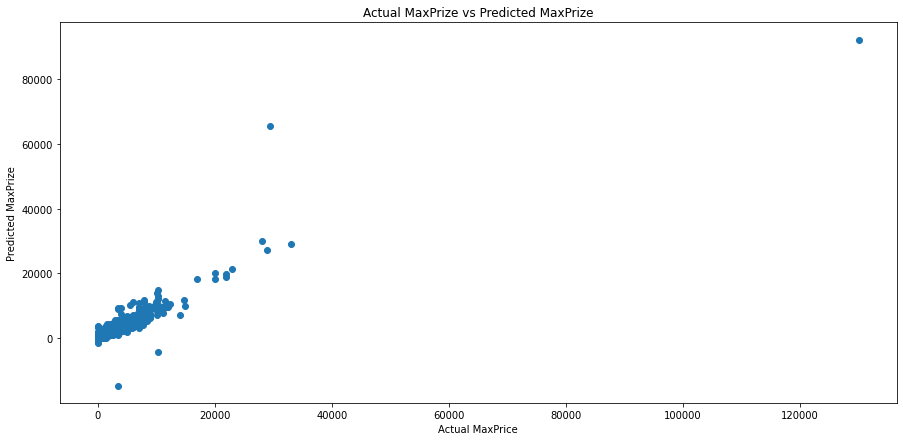

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual MaxPrice")
plt.ylabel("Predicted MaxPrize")
plt.title("Actual MaxPrize vs Predicted MaxPrize")
plt.show()

In [ ]:
test_data_prediction=las_reg_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R2 Error :", error_score)

R2 Error : 0.30811901006059694


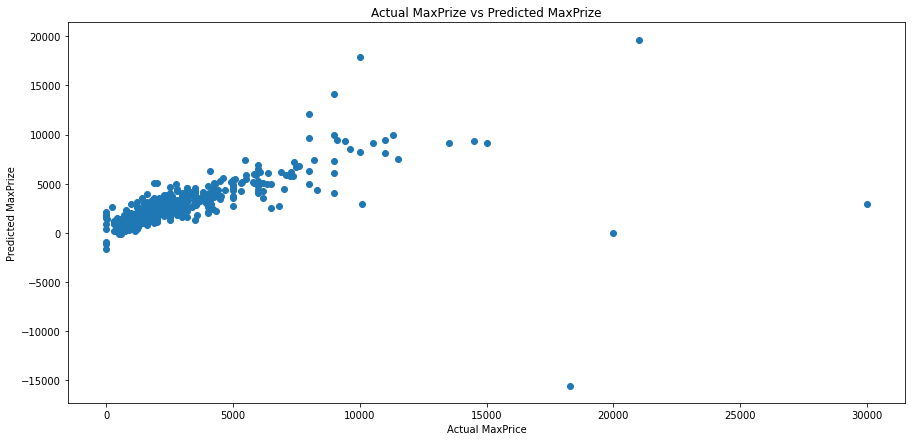

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual MaxPrice")
plt.ylabel("Predicted MaxPrize")
plt.title("Actual MaxPrize vs Predicted MaxPrize")
plt.show()

In [ ]:
import pickle

In [58]:
filename = 'CropPricePrediction.pkl'
pickle.dump(las_reg_model,open(filename,'wb'))